# Loading important packages 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pycaret
import pandas as pd
print(pd.__version__)
print(pycaret.__version__)

2.1.4
3.3.2


# Loading Dataset

In [3]:
df = pd.read_excel('../data/01_residential_data.xlsx')
df

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176455,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,560000.0,1.447195,103.814008,18624.123340,702.591563
176456,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,550000.0,1.447195,103.814008,18624.123340,702.591563
176457,366B,SEMBAWANG CRESCENT,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,565000.0,1.443922,103.815957,18223.416060,727.108165
176458,992B,BUANGKOK LINK,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,598000.0,1.383827,103.881672,11650.037860,1278.633561


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176460 entries, 0 to 176459
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   block                176460 non-null  object 
 1   street_name          176460 non-null  object 
 2   town                 176460 non-null  object 
 3   postal_code          176460 non-null  int64  
 4   month                176460 non-null  object 
 5   flat_type            176460 non-null  object 
 6   storey_range         176460 non-null  object 
 7   floor_area_sqm       176460 non-null  float64
 8   flat_model           176460 non-null  object 
 9   lease_commence_date  176460 non-null  int64  
 10  resale_price         176460 non-null  float64
 11  latitude             176460 non-null  float64
 12  longitude            176460 non-null  float64
 13  cbd_dist             176460 non-null  float64
 14  min_dist_mrt         176460 non-null  float64
dtypes: float64(6), in

- Total Entries: 176,460 rows.
- Total Features: 15 columns.
- No Missing Values: All columns have complete data.

Details: 
- block: Block number of the residential property.
- street_name: Street name where the property is located.
- town: The town or region in which the property is located.
- postal_code: The postal code of the property.
- month: The month of the transaction.
- flat_type: Type of flat (e.g., 3 ROOM, 4 ROOM).
- storey_range: Range of floors where the flat is located.
- floor_area_sqm: Floor area of the flat in square meters.
- flat_model: Model of the flat.
- lease_commence_date: The year the lease commenced.
- resale_price: The resale price of the flat.
- latitude: Latitude of the property.
- longitude: Longitude of the property.
- cbd_dist: Distance to the Central Business District (CBD) in meters.
- min_dist_mrt: Minimum distance to the nearest MRT station in meters.

In [5]:
df.describe()

,postal_code,floor_area_sqm,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
count,176460.000000,176460.000000,176460.000000,1.764600e+05,176460.000000,176460.000000,176460.000000,176460.000000
mean,560887.598725,97.449497,1995.223195,4.793598e+05,1.367588,103.841673,12427.507031,831.510563
std,190775.524205,24.049168,13.628932,1.651672e+05,0.042726,0.071216,4395.808395,464.516793
min,50004.000000,31.000000,1966.000000,1.400000e+05,1.270380,103.644248,592.121638,36.079525
25%,510187.000000,82.000000,1985.000000,3.600000e+05,1.336960,103.781229,9681.902128,475.328602
50%,560565.000000,94.000000,1996.000000,4.480000e+05,1.367409,103.846488,13343.661050,744.891776
75%,730149.000000,112.000000,2005.000000,5.680000e+05,1.395796,103.899484,15446.806430,1105.154334
max,825195.000000,259.000000,2019.000000,1.500000e+06,1.457071,103.987804,23298.462280,3496.402761


Summary Statistics:
- The dataset has 176,460 entries.
- The resale prices range from SGD 140,000 to SGD 1,500,000, with an average price of about SGD 479,360.
- Floor area ranges from 31 to 259 square meters, with an average size of about 97 square meters.
- The lease commencement year ranges from 1966 to 2019, with most properties having leases commencing around 1995.

In [6]:
df.isna().sum()

block                  0
street_name            0
town                   0
postal_code            0
month                  0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
latitude               0
longitude              0
cbd_dist               0
min_dist_mrt           0
dtype: int64

No misisng values

In [7]:
df.nunique()

block                  2668
street_name             572
town                     26
postal_code            9484
month                    91
flat_type                 7
storey_range             17
floor_area_sqm          171
flat_model               21
lease_commence_date      54
resale_price           3708
latitude               9485
longitude              9454
cbd_dist               9485
min_dist_mrt           9485
dtype: int64

In [8]:
df['block'].value_counts()

block
2       582
8       546
1       517
9       504
101     503
       ... 
226F      1
496F      1
860A      1
858B      1
992B      1
Name: count, Length: 2668, dtype: int64

In [9]:
df['street_name'].value_counts()

street_name
YISHUN RING ROAD         2639
BEDOK RESERVOIR ROAD     1980
PUNGGOL DRIVE            1941
PUNGGOL FIELD            1807
ANG MO KIO AVENUE 10     1720
                         ... 
KRETA AYER ROAD             5
SEMBAWANG WAY               2
ALJUNIED AVENUE 2           1
GEYLANG EAST AVENUE 2       1
MARINE PARADE CENTRAL       1
Name: count, Length: 572, dtype: int64

In [10]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN',
       'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH',
       'WOODLANDS', 'YISHUN', 'MARINE PARADE', 'BUKIT TIMAH'],
      dtype=object)

In [11]:
df[df['street_name'] == 'YISHUN RING ROAD']

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
204,107,YISHUN RING ROAD,YISHUN,760107,2016-01,3 ROOM,07 TO 09,67.0,New Generation,1982,300000.0,1.432221,103.827555,16710.39938,884.151705
206,108,YISHUN RING ROAD,YISHUN,760108,2016-01,3 ROOM,07 TO 09,67.0,New Generation,1985,266000.0,1.432324,103.829072,16695.71328,733.071260
207,108,YISHUN RING ROAD,YISHUN,760108,2016-01,3 ROOM,01 TO 03,68.0,Improved,1985,278000.0,1.432324,103.829072,16695.71328,733.071260
208,103,YISHUN RING ROAD,YISHUN,760103,2016-01,3 ROOM,04 TO 06,67.0,New Generation,1985,270000.0,1.431369,103.828893,16594.35837,712.765538
209,236,YISHUN RING ROAD,YISHUN,760236,2016-01,3 ROOM,10 TO 12,67.0,New Generation,1985,290000.0,1.434032,103.838824,16757.97621,661.909579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176117,809,YISHUN RING ROAD,YISHUN,760809,2023-07,5 ROOM,07 TO 09,121.0,Improved,1987,650888.0,1.416628,103.830741,14951.96620,262.805308
176138,796A,YISHUN RING ROAD,YISHUN,761796,2023-07,3 ROOM,04 TO 06,64.0,Simplified,1986,385000.0,1.419357,103.833073,15213.47264,218.463283
176218,620,YISHUN RING ROAD,YISHUN,760620,2023-07,4 ROOM,01 TO 03,83.0,Simplified,1987,460000.0,1.418924,103.834674,15143.19464,254.074049
176375,677B,YISHUN RING ROAD,YISHUN,762677,2023-07,5 ROOM,10 TO 12,113.0,Improved,2018,730000.0,1.422100,103.842666,15410.93082,1177.355259


In [12]:
min_date = df['month'].min()
max_date = df['month'].max()

print(min_date)
print(max_date)

2016-01
2023-07


In [13]:
df['floor_area_sqm'].unique()

array([ 68. ,  67. ,  92. ,  82. ,  91. ,  74. ,  85. ,  60. ,  59. ,
        93. ,  73. ,  62. ,  90. ,  84. , 115. , 118. , 144. , 146. ,
       104. ,  94. , 103. , 125. ,  65. ,  88. , 116. , 110. , 102. ,
       121. , 155. , 142. , 107. ,  95. , 108. , 100. ,  52. ,  64. ,
        58. , 120. ,  79. ,  86. , 114. , 109. , 136. ,  99. , 122. ,
       145. , 113. ,  96. , 123. , 137. , 131. ,  69. , 134. , 101. ,
       119. , 130. , 140. ,  89. , 127. ,  66. , 106. , 148. ,  75. ,
        98. , 105. ,  80. ,  81. ,  76. , 133. , 151. ,  70. , 112. ,
       128. ,  97. , 111. , 147. , 152. , 135. , 126. , 150. , 141. ,
        56. ,  60.3,  61. , 139. , 132. ,  44. ,  45. , 117. ,  46. ,
        63.1, 157. , 124. , 143. ,  83. ,  87. ,  34. ,  77. ,  42. ,
        71. , 149. , 164. ,  78. , 153. , 199. , 154. , 129. , 162. ,
       189. ,  63. , 176. ,  31. ,  53. , 170. ,  54. , 138. , 159. ,
        57. ,  50. , 163. , 175. , 187. , 177. , 172. ,  72. ,  47. ,
        48. , 161. ,

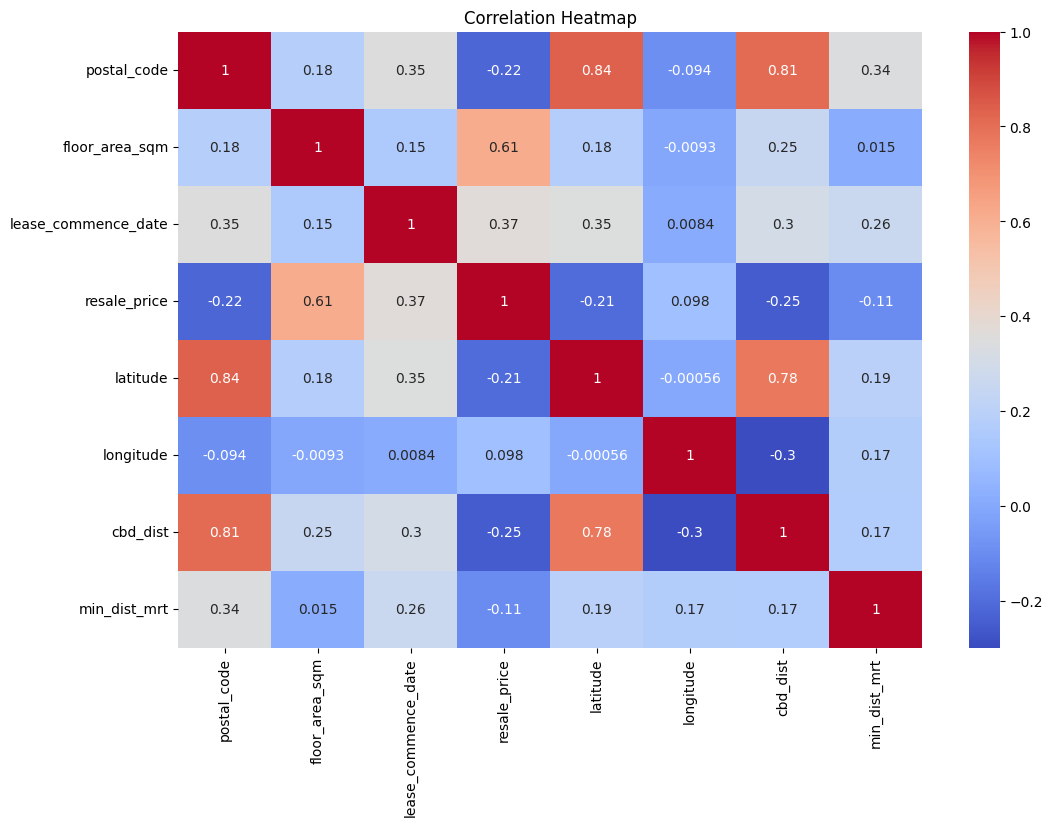

In [14]:
# Correlation heatmap
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the correlation heatmap, we can see that significant features with positive correlation with resale price are mainly floor area sqm and lease commence data whereas postal code, latitude, cbd dist are negatively correlated. Furthermore, there may be multicollinearity issues for postal code cbd_dist and latitude.


Correlation Analysis:
- The correlation matrix reveals a few strong correlations:
- Floor area (sqm) has a moderate positive correlation with resale price (0.64), indicating that larger flats tend to have higher resale prices.
- Lease commencement date has a positive correlation with resale price (0.50), suggesting that newer properties generally have higher resale values.
- Latitude and longitude show a moderate correlation with distance to CBD and distance to the nearest MRT station, which makes sense geographically.

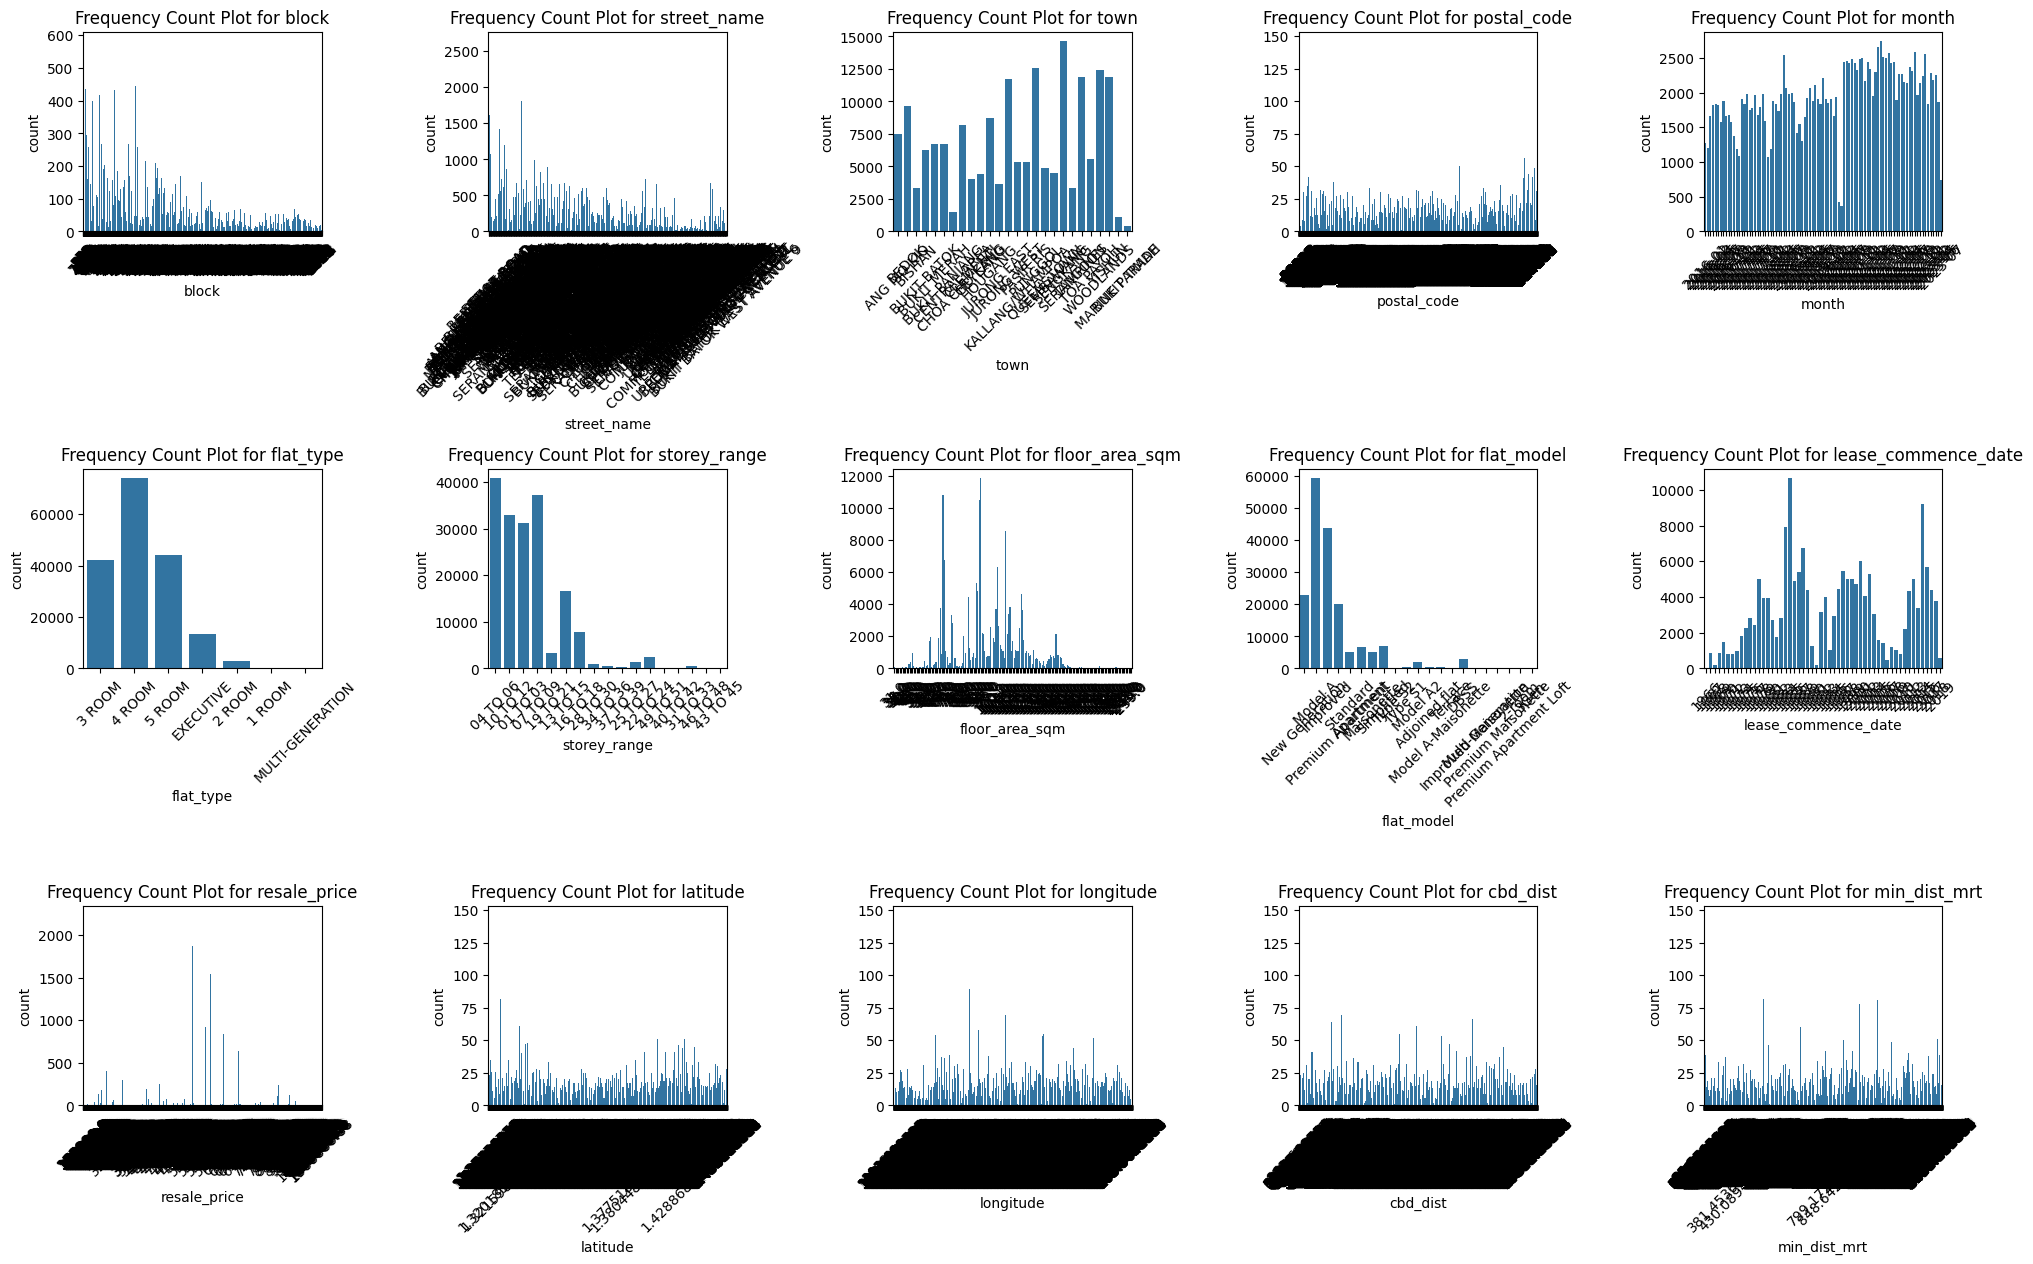

In [15]:
# Set up the matplotlib figure
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(df.columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Frequency Count Plot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

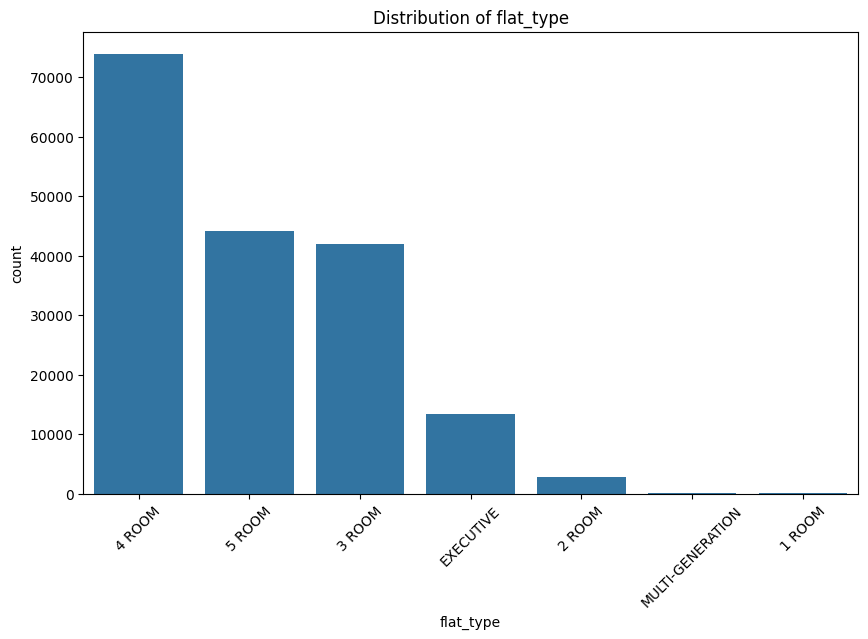

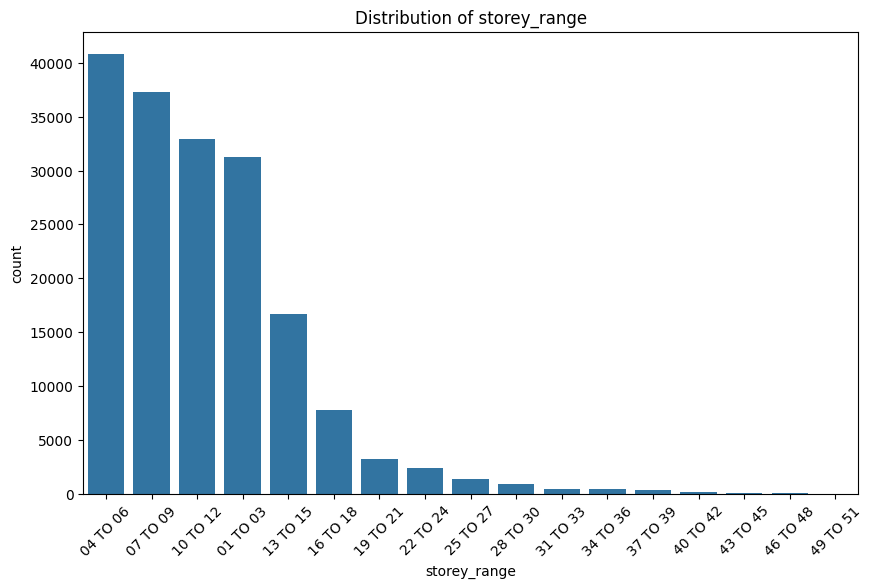

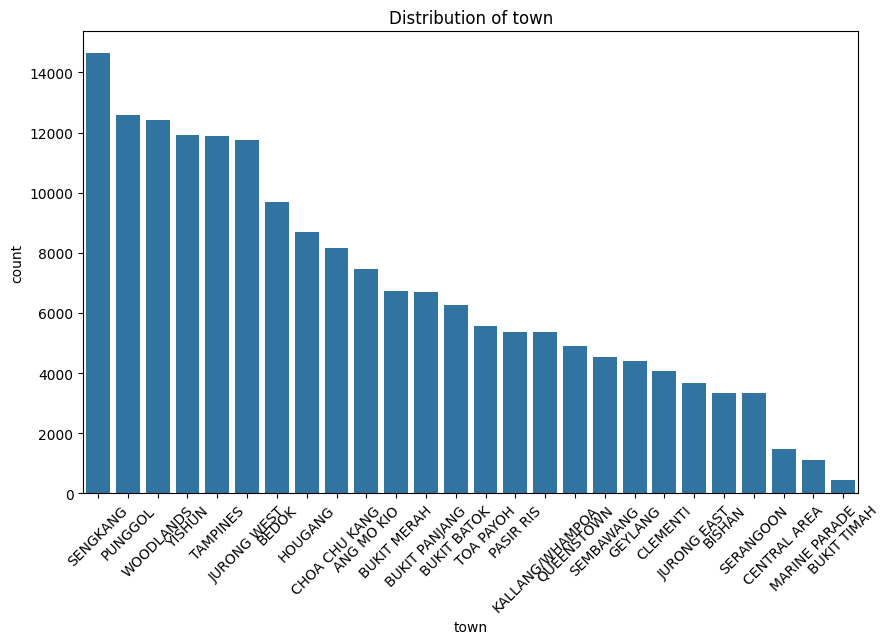

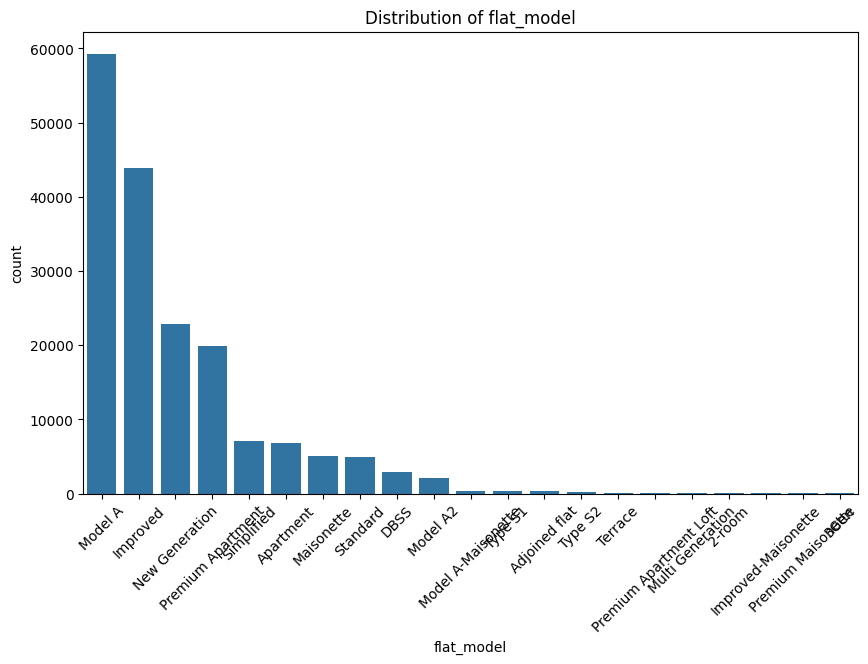

In [16]:
# Visualize the distribution of categorical features
categorical_features = ['flat_type', 'storey_range', 'town', 'flat_model']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

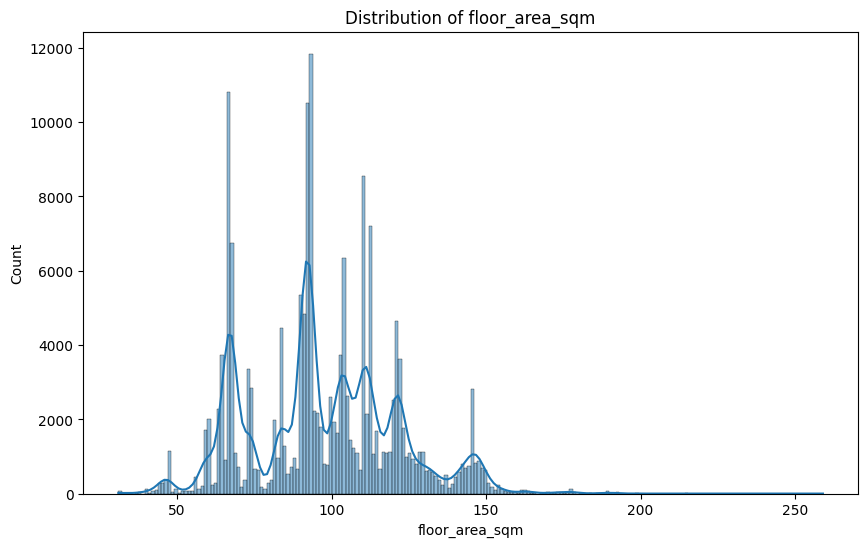

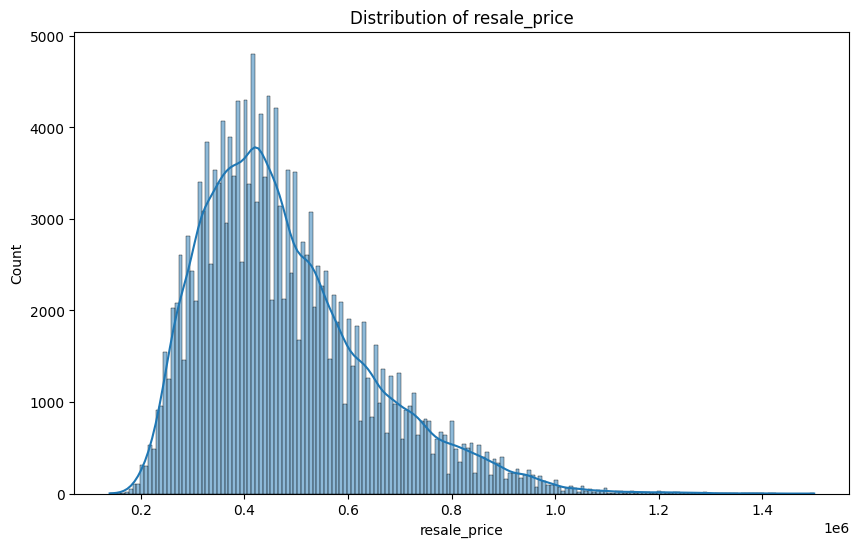

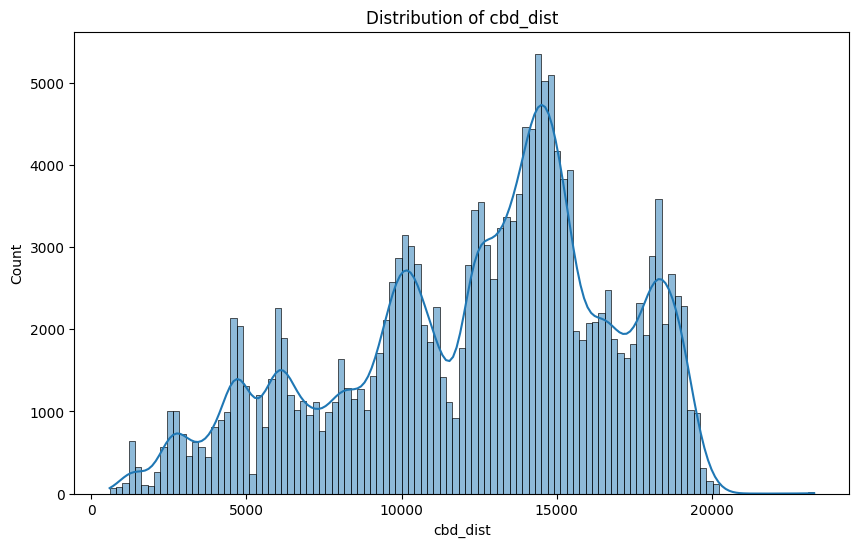

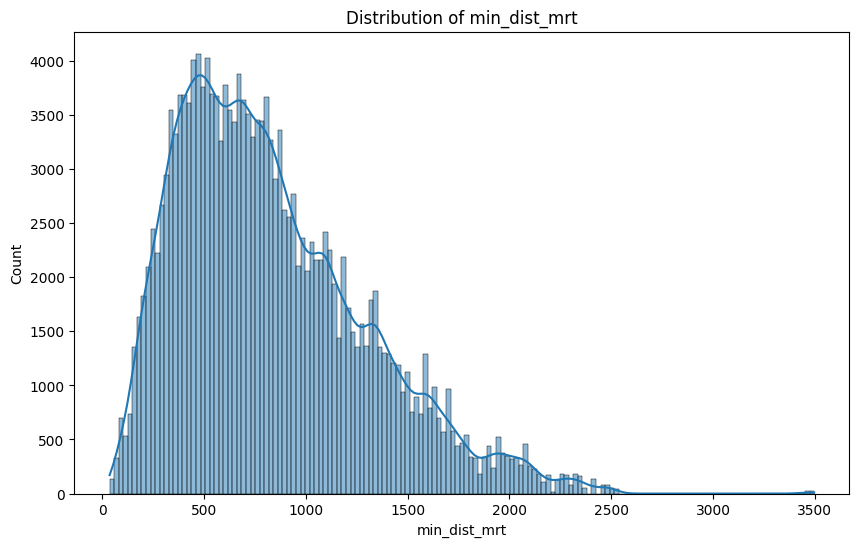

In [17]:
# Visualize the distribution of numerical features
numerical_features = ['floor_area_sqm', 'resale_price', 'cbd_dist', 'min_dist_mrt']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

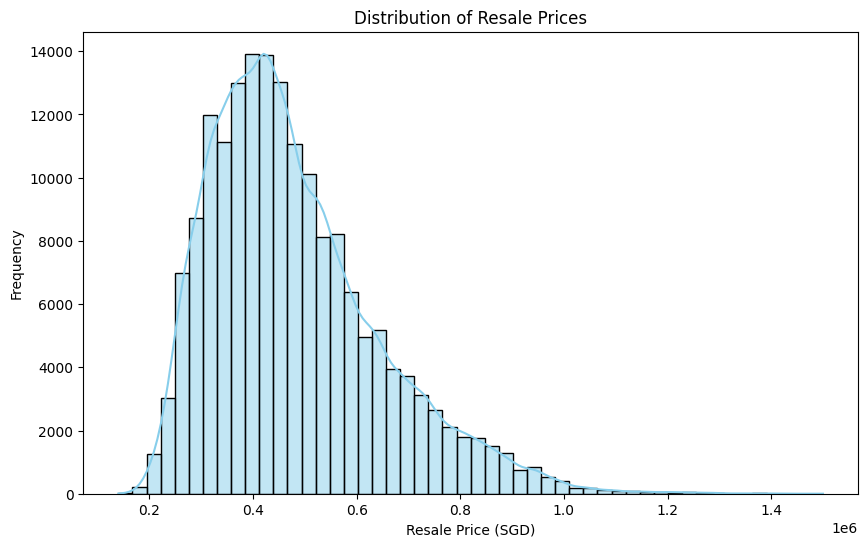

In [18]:
# Distribution of resale price
plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price (SGD)')
plt.ylabel('Frequency')
plt.show()

Resale Price Distribution:

The resale price distribution is right-skewed, with most properties selling in the range of SGD 300,000 to SGD 600,000. However, there are some high-value properties exceeding SGD 1,000,000.

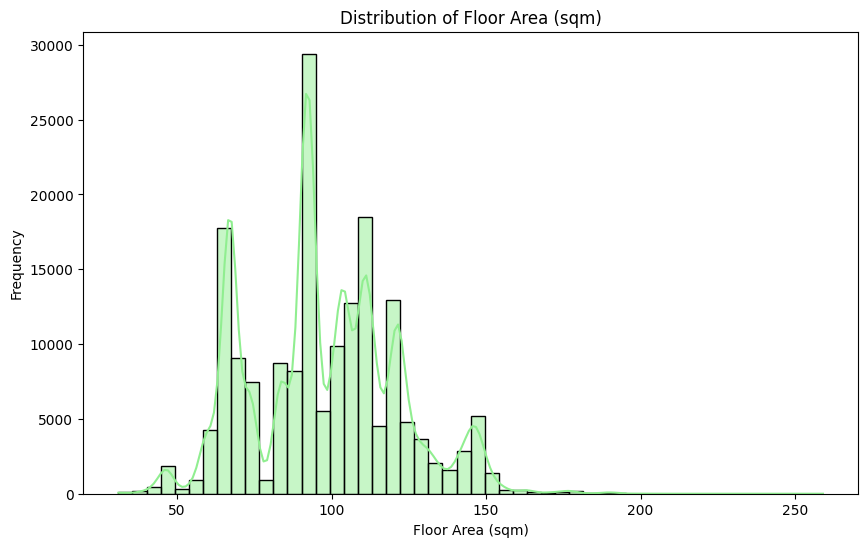

In [19]:
# Distribution of floor area
plt.figure(figsize=(10, 6))
sns.histplot(df['floor_area_sqm'], kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()

Floor Area Distribution:

The distribution of floor area is also right-skewed, with most properties having a floor area between 60 and 130 square meters. A few properties have significantly larger floor areas.

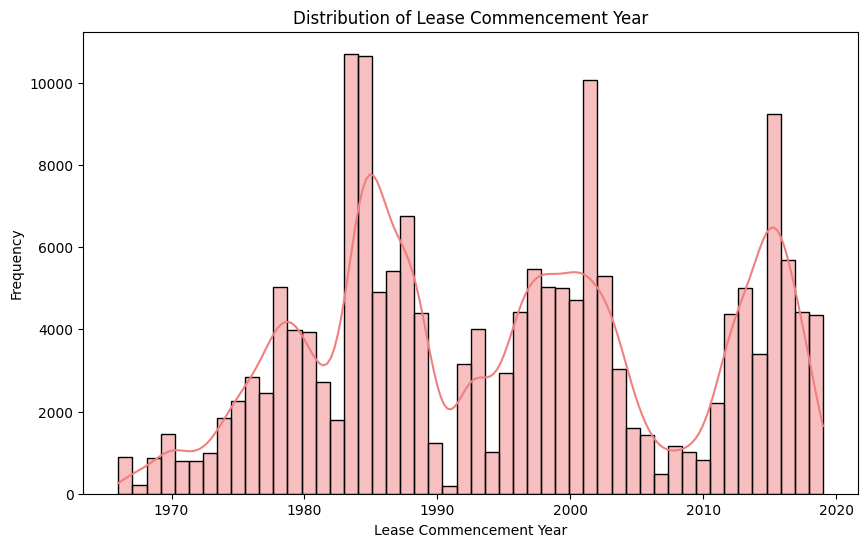

In [20]:
# Distribution of lease commence date
plt.figure(figsize=(10, 6))
sns.histplot(df['lease_commence_date'], kde=True, bins=50, color='lightcoral')
plt.title('Distribution of Lease Commencement Year')
plt.xlabel('Lease Commencement Year')
plt.ylabel('Frequency')
plt.show()

Lease Commencement Year:

The majority of properties have leases that commenced between 1980 and 2010, with a peak around the 1990s. This suggests that many of the properties in the dataset are relatively new, built in the last few decades.

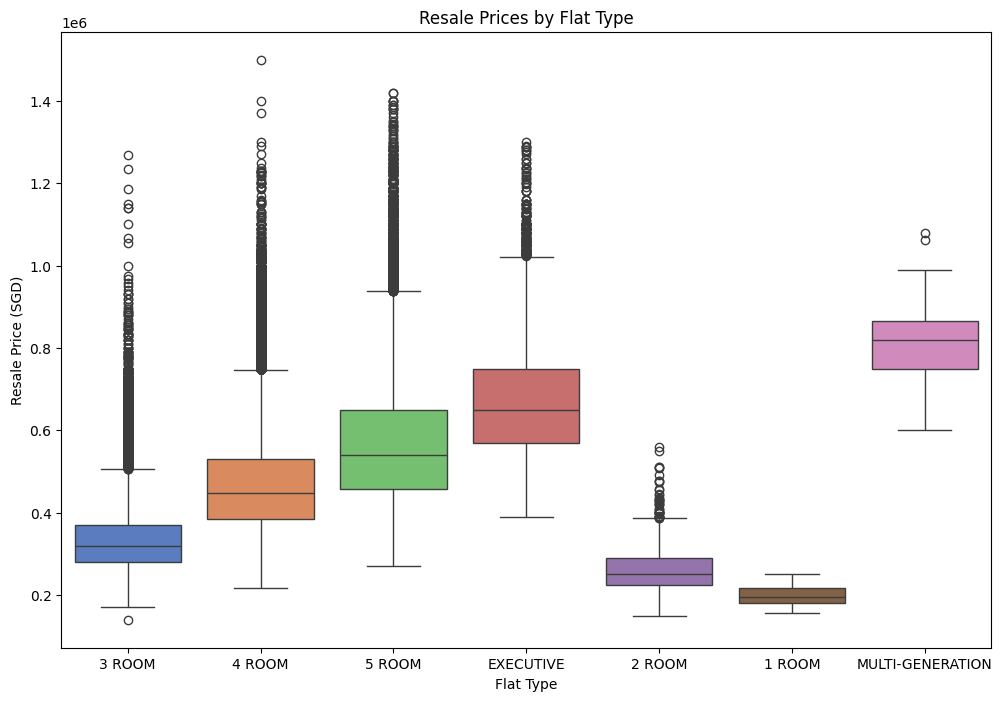

In [21]:
# Boxplot for resale prices by flat type
plt.figure(figsize=(12, 8))
sns.boxplot(x='flat_type', y='resale_price', data=df, palette='muted')
plt.title('Resale Prices by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price (SGD)')
plt.show()

Resale Prices by Flat Type:

The boxplot reveals that resale prices generally increase with the size of the flat type. For example, 5 ROOM flats and Executive flats tend to have higher resale prices compared to 3 ROOM or 4 ROOM flats. However, there are significant overlaps, indicating variability within each flat type.

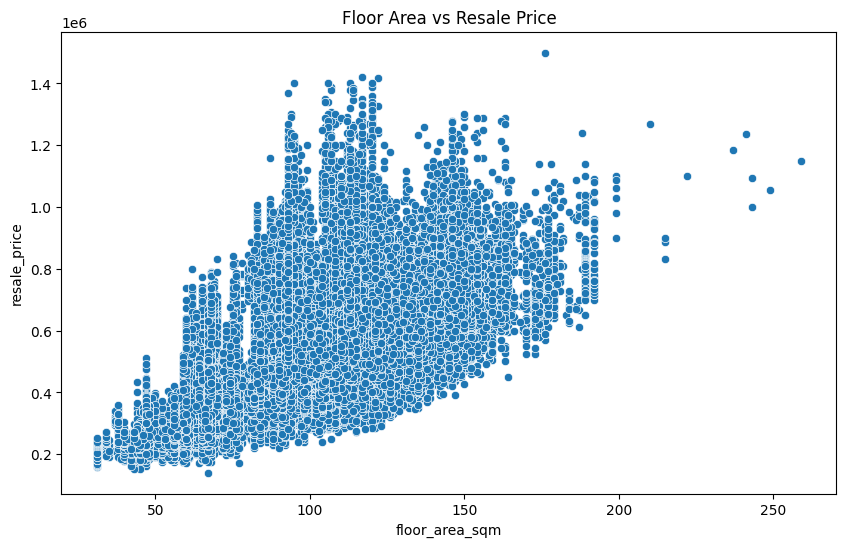

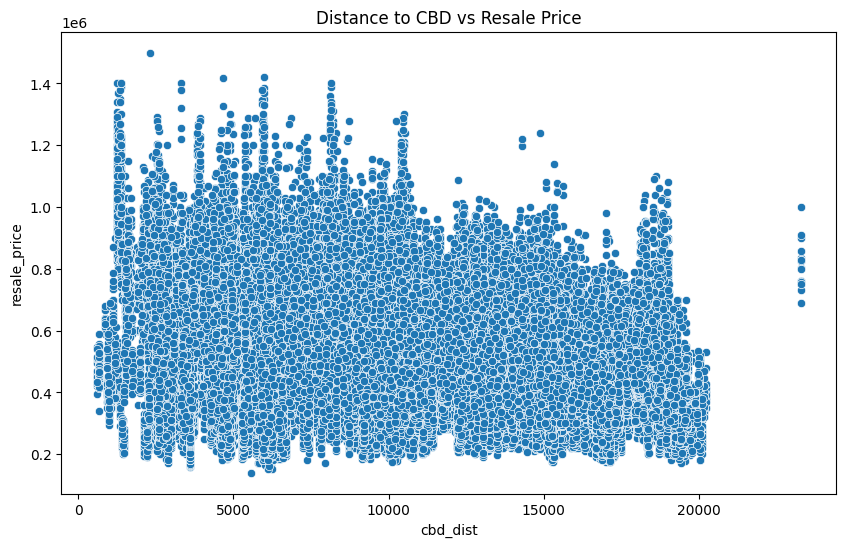

In [22]:
# Scatter plot of selected features against resale_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df)
plt.title('Floor Area vs Resale Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='cbd_dist', y='resale_price', data=df)
plt.title('Distance to CBD vs Resale Price')
plt.show()


Resale Price VS Floor Area Sqm 

- Positive correlation: The overall trend is upward-sloping, indicating that as the floor area increases, the resale price tends to increase as well. This is intuitive, as larger properties are generally more valuable.
- Scatter: The points are scattered, suggesting that while floor area is an important factor in determining resale price, other factors are also at play. These could include location, age of the property, floor level, amenities, and overall market conditions.
- Clusters: There appear to be some clusters of points, potentially indicating different types or categories of properties. For instance, there might be clusters for different flat types (e.g., 3-room, 4-room, 5-room) or different locations.
- Outliers: There are a few outliers, particularly at the higher end of the floor area range. These could represent unique or exceptional properties that command a premium price.

Resale Price VS CBD_Dist
- General Trend: There's a clear downward trend. Properties closer to the CBD tend to have higher resale prices, while those further away generally have lower prices. This is a common phenomenon in real estate markets, as proximity to central business districts often comes with advantages like better accessibility, amenities, and job opportunities, driving up property values.
- Price Variation:  While the general trend is downward, there’s significant price variation at any given distance. This suggests that other factors besides CBD proximity influence resale prices. These could include property size, age, condition, amenities, floor level, and prevailing market conditions.
- Data Density: The plot is quite dense with data points, indicating a large number of properties analyzed. The higher density of points at lower distances suggests a greater concentration of properties closer to the CBD.

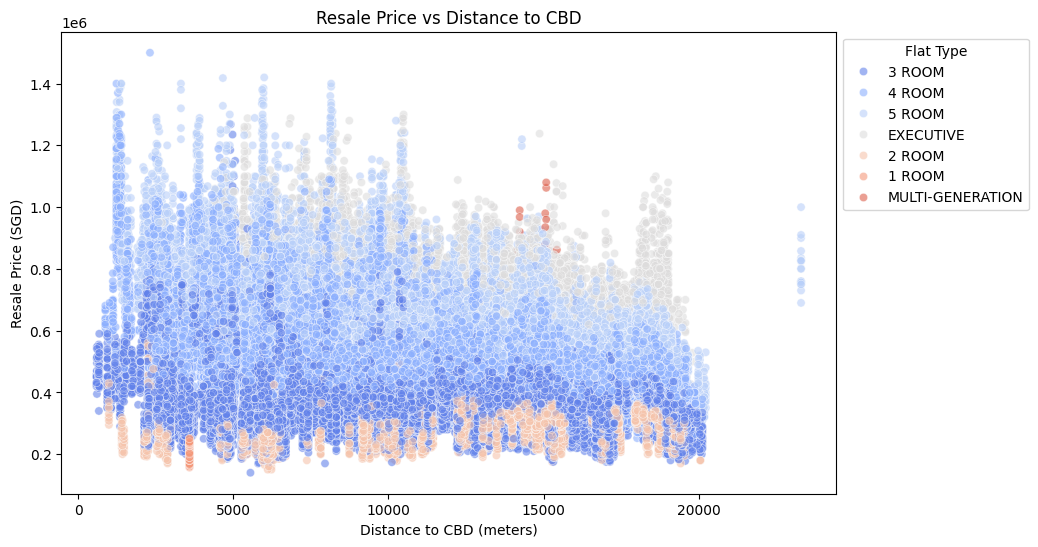

In [23]:
# Scatter plot for distance to CBD vs resale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cbd_dist', y='resale_price', data=df, hue='flat_type', palette='coolwarm', alpha=0.6)
plt.title('Resale Price vs Distance to CBD')
plt.xlabel('Distance to CBD (meters)')
plt.ylabel('Resale Price (SGD)')
plt.legend(title='Flat Type', bbox_to_anchor=(1, 1))
plt.show()

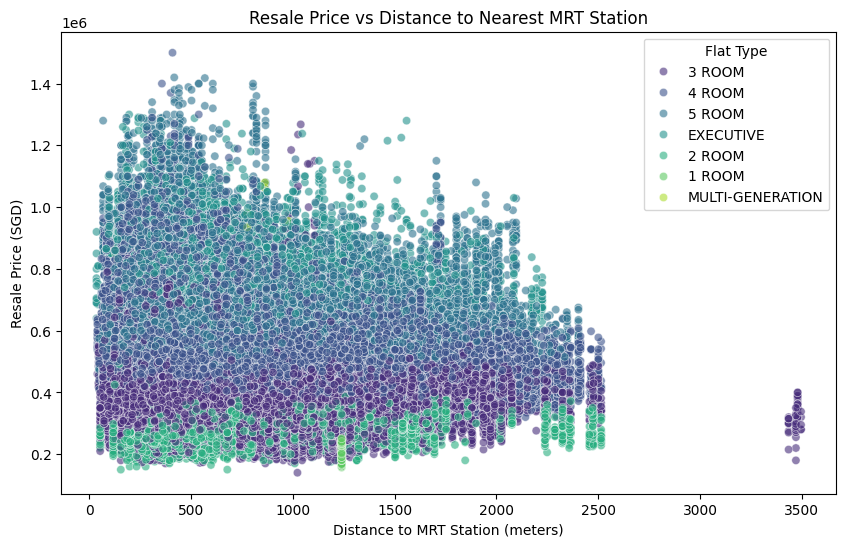

In [24]:
# Scatter plot for distance to MRT vs resale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='min_dist_mrt', y='resale_price', data=df, hue='flat_type', palette='viridis', alpha=0.6)
plt.title('Resale Price vs Distance to Nearest MRT Station')
plt.xlabel('Distance to MRT Station (meters)')
plt.ylabel('Resale Price (SGD)')
plt.legend(title='Flat Type', bbox_to_anchor=(1, 1))
plt.show()

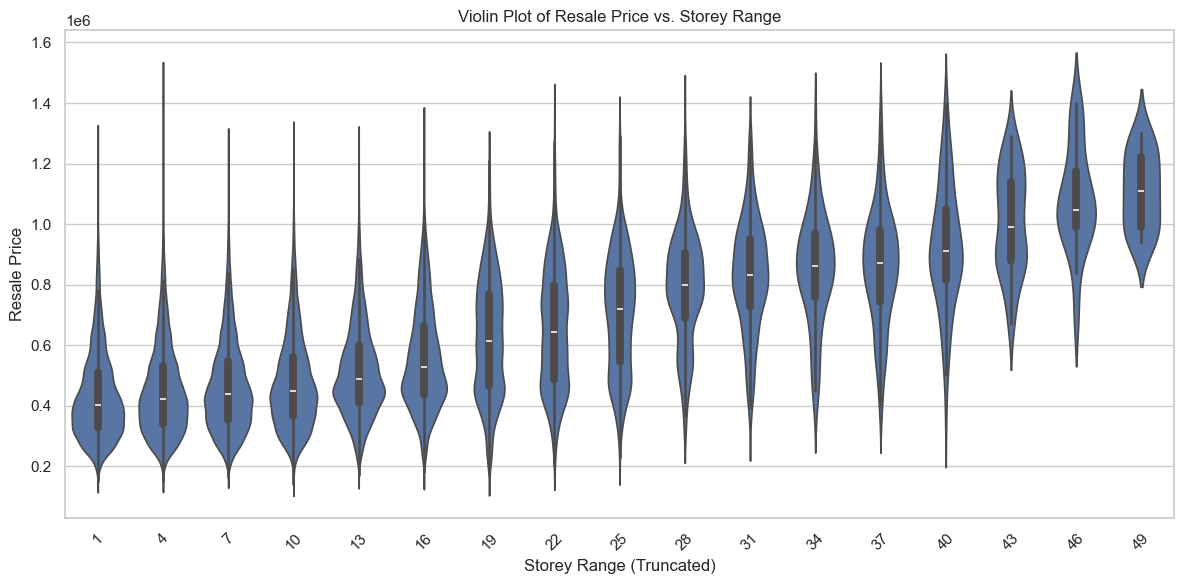

In [25]:
# Truncate 'storey_range' to the first two digits and convert to numerical values
df['storey_number'] = df['storey_range'].str[:2].astype(int)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.violinplot(x='storey_number', y='resale_price', data=df, order=sorted(df['storey_number'].unique()))

# Customize the plot
plt.title('Violin Plot of Resale Price vs. Storey Range')
plt.ylabel('Resale Price')
plt.xlabel('Storey Range (Truncated)')
plt.xticks(rotation=45)
plt.tight_layout()  

# Display the plot
plt.show()

The chart is a "Violin Plot of Resale Price vs. Storey Range (Truncated)". This visualization combines aspects of a box plot and a density plot to showcase the distribution of resale prices across different storey ranges (likely of buildings or apartments).

- Distribution Shape: Each violin shape represents the distribution of resale prices for a particular storey range. The width of the violin at any given point indicates the density or frequency of properties at that price point.

- Median and Interquartile Range: The white dot within each violin marks the median resale price for that storey range. The thick black bar represents the interquartile range (IQR), containing the middle 50% of the data. This gives a sense of the spread of prices.

- Overall Trend: It appears that there's a general trend of decreasing resale prices as the storey range increases. The violins for lower storey ranges (left side of the chart) are generally wider and higher up, indicating a wider range of prices and a higher concentration of expensive properties. As we move towards higher storey ranges (right side), the violins become narrower and lower, suggesting a narrower price range and a greater concentration of lower-priced properties.

- Data Density: The varying widths within each violin highlight where the data is more concentrated. For example, several violins have a bulge towards their lower ends, indicating a greater number of properties at lower prices within those storey ranges.

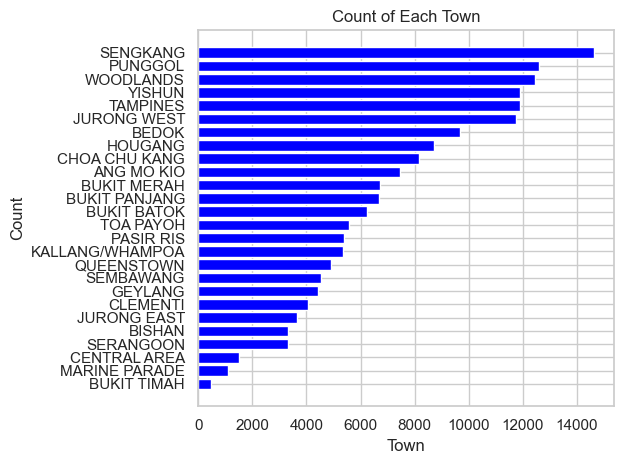

In [26]:
town_counts = df['town'].value_counts().sort_values(ascending=True)

# Create a sorted bar chart
plt.barh(town_counts.index, town_counts.values, color='blue')

# Customize the plot
plt.title('Count of Each Town')
plt.xlabel('Town')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [27]:
average_price = df['resale_price'].mean()

print(f"The average resale price is: {average_price}")

The average resale price is: 479359.8135324153


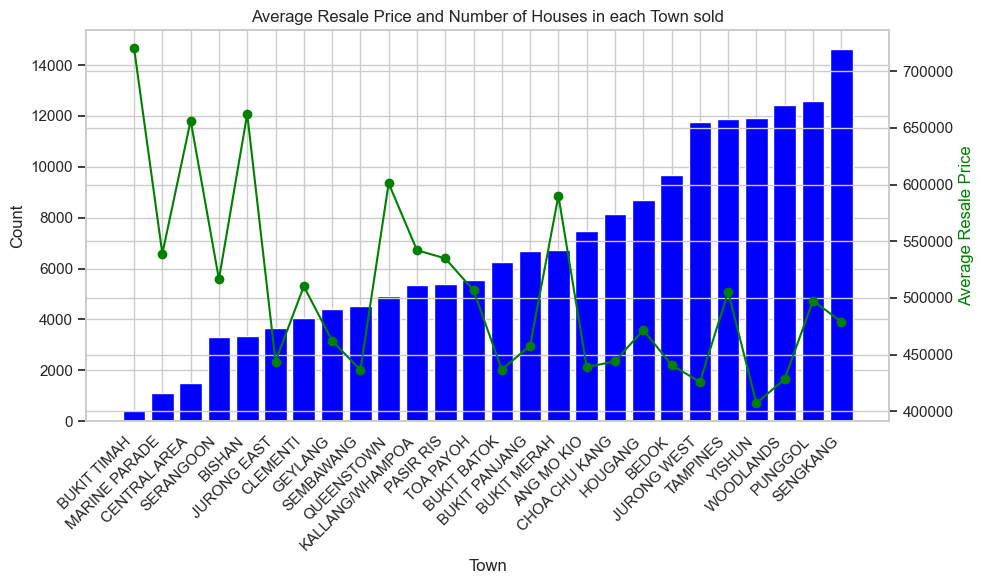

In [28]:
# Calculate town counts
town_counts = df['town'].value_counts().sort_values(ascending=True)

# Create a figure and axis for the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for town counts
ax1.bar(town_counts.index, town_counts.values, color='blue')
ax1.set_ylabel('Count')
ax1.set_xlabel('Town')
ax1.set_title('Average Resale Price and Number of Houses in each Town sold')

# Explicitly set x-axis labels to follow the order of town counts
ax1.set_xticks(town_counts.index)
ax1.set_xticklabels(town_counts.index, rotation=45, ha='right')

# Create a secondary y-axis for the line chart
ax2 = ax1.twinx()
avg_price = df.groupby('town')['resale_price'].mean()

# Line chart for average resale price
ax2.plot(town_counts.index, avg_price[town_counts.index], marker='o', color='green')
ax2.set_ylabel('Average Resale Price')
ax2.yaxis.label.set_color('green')

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
# Outlier detection in resale prices and floor area using IQR method
Q1_price = df['resale_price'].quantile(0.25)
Q3_price = df['resale_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
outliers_price = df[(df['resale_price'] < (Q1_price - 1.5 * IQR_price)) | (df['resale_price'] > (Q3_price + 1.5 * IQR_price))]

Q1_area = df['floor_area_sqm'].quantile(0.25)
Q3_area = df['floor_area_sqm'].quantile(0.75)
IQR_area = Q3_area - Q1_area
outliers_area = df[(df['floor_area_sqm'] < (Q1_area - 1.5 * IQR_area)) | (df['floor_area_sqm'] > (Q3_area + 1.5 * IQR_area))]

outliers_price.shape[0], outliers_area.shape[0]

(4314, 1053)

# Data Preprocessing

## Duplicated Data 

In [30]:
# check if there is any duplicates 
df.duplicated().sum()

349

In [31]:
# print rows that are duplicated
df[df.duplicated()]

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt,storey_number
688,450,CLEMENTI AVENUE 3,CLEMENTI,120450,2016-01,3 ROOM,04 TO 06,82.0,New Generation,1980,410000.0,1.313448,103.765484,10126.64744,187.311456,4
957,436A,FERNVALE ROAD,SENGKANG,791436,2016-01,4 ROOM,13 TO 15,96.0,Model A,2010,455000.0,1.392726,103.876507,12453.05966,2115.045830,13
1872,467,ADMIRALTY DRIVE,SEMBAWANG,750467,2016-02,4 ROOM,07 TO 09,102.0,Premium Apartment,2001,365000.0,1.452227,103.814426,19156.90996,717.283030,7
2482,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-03,3 ROOM,04 TO 06,68.0,New Generation,1981,340000.0,1.361343,103.851699,8662.83136,928.311457,4
4988,830,TAMPINES STREET 82,TAMPINES,520830,2016-04,3 ROOM,01 TO 03,70.0,Simplified,1986,315000.0,1.349842,103.934818,11875.14347,619.502715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169842,28,MARSILING DRIVE,WOODLANDS,730028,2023-04,4 ROOM,07 TO 09,97.0,New Generation,1977,395000.0,1.442791,103.773707,19666.11916,1136.324402,7
171438,449B,BUKIT BATOK WEST AVENUE 9,BUKIT BATOK,652449,2023-04,4 ROOM,07 TO 09,93.0,Model A,2019,620000.0,1.351979,103.741081,14444.29917,987.033105,7
172390,7,MARSILING DRIVE,WOODLANDS,730007,2023-05,4 ROOM,04 TO 06,88.0,Improved,1976,360000.0,1.441669,103.776733,19408.34179,1053.916129,4
174079,92,BEDOK NORTH AVENUE 4,BEDOK,460092,2023-06,3 ROOM,01 TO 03,67.0,New Generation,1979,350000.0,1.332444,103.941298,11410.96563,806.929986,1


In [32]:
# drop storey number
df = df.drop('storey_number', axis=1)

In [33]:
# Display the shape before and after removing duplicates
print("Shape before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape before removing duplicates: (176460, 15)
Shape after removing duplicates: (176111, 15)


## Data Types

In [34]:
# Convert month to datetime 
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

In [35]:
# Ensure 'postal_code' is int
df['postal_code'] = df['postal_code'].astype(int)

In [36]:
# save this processed data 
# df.to_excel('../data/housing_clean.xlsx')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176111 entries, 0 to 176459
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   block                176111 non-null  object        
 1   street_name          176111 non-null  object        
 2   town                 176111 non-null  object        
 3   postal_code          176111 non-null  int32         
 4   month                176111 non-null  datetime64[ns]
 5   flat_type            176111 non-null  object        
 6   storey_range         176111 non-null  object        
 7   floor_area_sqm       176111 non-null  float64       
 8   flat_model           176111 non-null  object        
 9   lease_commence_date  176111 non-null  int64         
 10  resale_price         176111 non-null  float64       
 11  latitude             176111 non-null  float64       
 12  longitude            176111 non-null  float64       
 13  cbd_dist           

# Pycaret Processing

- target: resale price
- train size: 0.8
- remove outliers
- ignore features not required : block number, latitude and longitude
- date feature: month 
- bin: postal code (Binning postal_code helps reduce the dimensionality of this feature if it has too many unique values.)
- categorical features: flat_type, storey_range, flat_model, town

In [38]:
from pycaret.regression import *

import mlflow
import mlflow.sklearn
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [41]:
# Initialize the setup with your requirements
s = setup(
    data=df, 
    target='resale_price', 
    session_id=123, 
    train_size=0.8, 
    normalize=True, 
    transformation=True, 
    remove_outliers=True, 
    ignore_features=['block', 'latitude', 'longitude'], 
    date_features=['month'], 
    bin_numeric_features=['postal_code'], 
    categorical_features=['town','street_name','flat_type','flat_model','storey_range'], 
    log_experiment=True, 
    experiment_name='hdb_resale_price_prediction'
)

,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(176111, 15)"
4,Transformed data shape,"(169066, 56)"
5,Transformed train set shape,"(133843, 56)"
6,Transformed test set shape,"(35223, 56)"
7,Ignore features,3
8,Numeric features,5
9,Date features,1


2024/08/21 14:13:57 INFO mlflow.tracking.fluent: Experiment with name 'hdb_resale_price_prediction' does not exist. Creating a new experiment.


In [42]:
#Print ordinal, numeric and categorical features
print(f'Ordinal features: {s._fxs["Ordinal"]}')
print(f'Numeric features: {s._fxs["Numeric"]}')
print(f'Categorical features: {s._fxs["Categorical"]}')
print(f'Date features: {s._fxs["Date"]}')

Ordinal features: {}
Numeric features: ['postal_code', 'floor_area_sqm', 'lease_commence_date', 'cbd_dist', 'min_dist_mrt']
Categorical features: ['town', 'street_name', 'flat_type', 'flat_model', 'storey_range']
Date features: ['month']


In [43]:
df_new = s.get_config('dataset_transformed')
df_new

,street_name,town,postal_code,month_year,month_month,month_day,flat_type_4 ROOM,flat_type_3 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,...,flat_model_Improved-Maisonette,flat_model_Type S2,flat_model_Premium Maisonette,flat_model_Premium Apartment Loft,flat_model_Multi Generation,flat_model_3Gen,lease_commence_date,cbd_dist,min_dist_mrt,resale_price
101401,0.444471,6.661338e-16,-0.489916,0.189787,1.024994,0.0,1.146011,-0.551711,-0.585877,-0.2799,...,-0.011271,-0.011271,-0.010587,-0.022212,-0.021178,-0.009066,-1.065814e-13,-0.329130,-0.546311,359000.0
164327,-0.449227,-4.662937e-15,0.382511,1.646316,-1.753950,0.0,-0.872592,1.812542,-0.585877,-0.2799,...,-0.011271,-0.011271,-0.010587,-0.022212,-0.021178,-0.009066,-2.337575e-13,0.299529,0.118601,350000.0
38416,0.206026,-6.439294e-15,0.382511,-1.171108,1.544776,0.0,1.146011,-0.551711,-0.585877,-0.2799,...,-0.011271,-0.011271,-0.010587,-0.022212,-0.021178,-0.009066,3.985701e-14,0.626677,0.116428,416888.0
39452,0.700175,6.661338e-16,-0.489916,-1.171108,1.544776,0.0,1.146011,-0.551711,-0.585877,-0.2799,...,-0.011271,-0.011271,-0.010587,-0.022212,-0.021178,-0.009066,-1.699751e-13,-0.467651,-0.682219,415000.0
107113,0.280024,7.494005e-15,-0.489916,0.664355,-1.753950,0.0,1.146011,-0.551711,-0.585877,-0.2799,...,-0.011271,-0.011271,-0.010587,-0.022212,-0.021178,-0.009066,1.904032e-14,0.279994,1.597825,428000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135562,0.345333,1.665335e-15,1.317341,0.664355,1.544776,0.0,-0.872592,-0.551711,1.706842,-0.2799,...,-0.011271,-0.011271,-0.010587,-0.022212,-0.021178,-0.009066,4.066747e-13,-0.118363,1.923312,585000.0
115684,1.817942,1.554312e-14,-0.489916,0.664355,-0.702290,0.0,1.146011,-0.551711,-0.585877,-0.2799,...,-0.011271,-0.011271,-0.010587,-0.022212,-0.021178,-0.009066,-1.699751e-13,-1.334268,-0.267556,410000.0
141003,1.751978,4.718448e-15,-1.285031,1.149784,-1.029772,0.0,1.146011,-0.551711,-0.585877,-0.2799,...,-0.011271,-0.011271,-0.010587,-0.022212,-0.021178,-0.009066,2.858824e-13,-1.596938,-1.574915,725000.0
2837,2.267285,5.218048e-15,-1.974665,-1.604562,-1.029772,0.0,1.146011,-0.551711,-0.585877,-0.2799,...,-0.011271,-0.011271,-0.010587,-0.022212,-0.021178,-0.009066,-2.337575e-13,-0.723407,0.910458,650000.0


In [44]:
# compare the model 
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,19572.3140,742332506.9280,27243.3241,0.9728,0.0557,0.0419,30.3960
xgboost,Extreme Gradient Boosting,21064.7098,867344646.4000,29448.2613,0.9682,0.0595,0.0448,3.6910
rf,Random Forest Regressor,21520.3360,1043250029.0470,32291.5535,0.9617,0.0619,0.0450,31.9000
et,Extra Trees Regressor,21456.8192,1042961296.6063,32283.2851,0.9617,0.0635,0.0453,38.0740
lightgbm,Light Gradient Boosting Machine,24159.4769,1133252806.6138,33661.3590,0.9584,0.0675,0.0513,5.8270
dt,Decision Tree Regressor,29222.6265,1932686010.0159,43952.0532,0.9291,0.0847,0.0610,4.0130
knn,K Neighbors Regressor,34448.3547,2644719155.2000,51417.1402,0.9030,0.0966,0.0701,8.3150
gbr,Gradient Boosting Regressor,39188.3763,2984924361.4112,54633.6748,0.8905,0.1075,0.0829,14.0450
lr,Linear Regression,50670.4388,4324466425.4161,65758.9259,0.8413,0.1677,0.1135,7.2140
ridge,Ridge Regression,54184.8500,4972698749.0303,70516.8700,0.8176,0.1659,0.1206,3.5960


In [45]:
# check the final params of selected model

best_model.get_params()

{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 123}

In [46]:
unseen_predictions = predict_model(best_model, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,19121.9037,698198046.3654,26423.4374,0.9744,0.0546,0.0411


# Analyse the Model

In [47]:
best = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19598.4330,776974358.4773,27874.2598,0.9710,0.0561,0.0418
1,19668.5173,739011790.6411,27184.7713,0.9727,0.0558,0.0421
2,19733.0828,751945885.4578,27421.6317,0.9729,0.0562,0.0422
3,19901.8357,766212831.6422,27680.5497,0.9723,0.0560,0.0423
4,19510.9658,726242016.7191,26948.8778,0.9730,0.0559,0.0419
5,19457.5129,722570713.0511,26880.6755,0.9741,0.0547,0.0415
6,19542.0676,745817388.4010,27309.6574,0.9719,0.0564,0.0421
7,19322.1691,737213885.1505,27151.6829,0.9726,0.0551,0.0413
8,19274.1291,705933792.9033,26569.4146,0.9741,0.0547,0.0415


In [48]:
best2 = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21206.3711,906423040.0000,30106.8594,0.9662,0.0598,0.0448
1,21026.6953,862183232.0000,29362.9570,0.9682,0.0595,0.0448
2,21331.5332,889184832.0000,29819.2031,0.9679,0.0604,0.0453
3,21134.1953,873002688.0000,29546.6191,0.9684,0.0590,0.0448
4,21147.1953,863420224.0000,29384.0137,0.9679,0.0605,0.0453
5,20815.3633,836606656.0000,28924.1543,0.9700,0.0580,0.0441
6,21110.3789,866832064.0000,29442.0117,0.9674,0.0600,0.0452
7,20636.6367,848762496.0000,29133.5293,0.9685,0.0591,0.0440
8,20837.6328,835012608.0000,28896.5840,0.9694,0.0587,0.0445


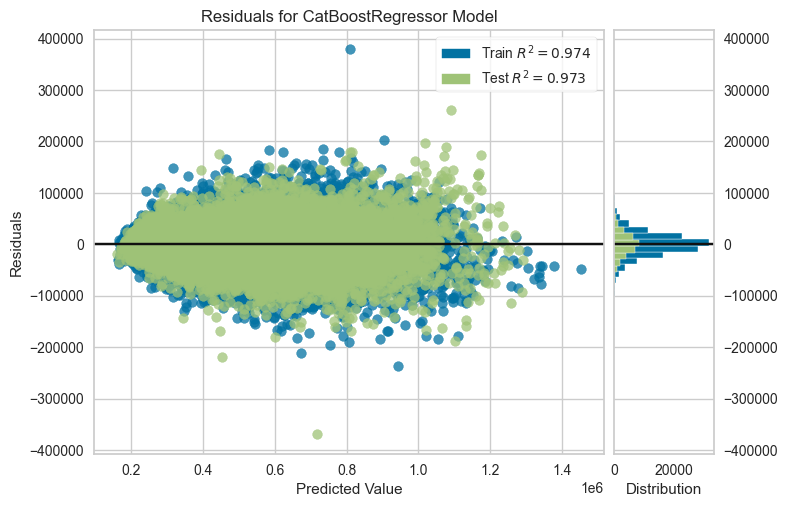

In [49]:
# Analyze the Model 
plot_model(best_model, plot = 'residuals')

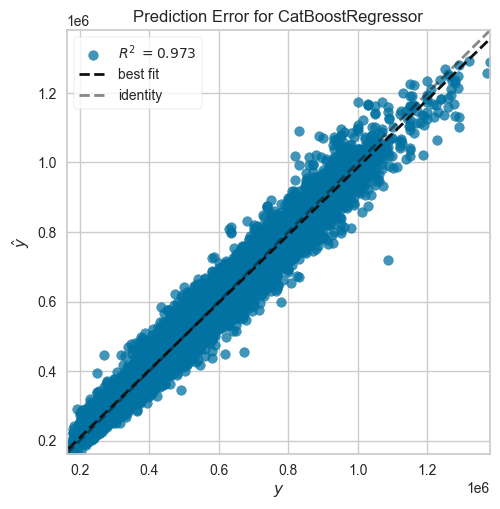

In [50]:
# plot error
plot_model(best_model, plot='error')

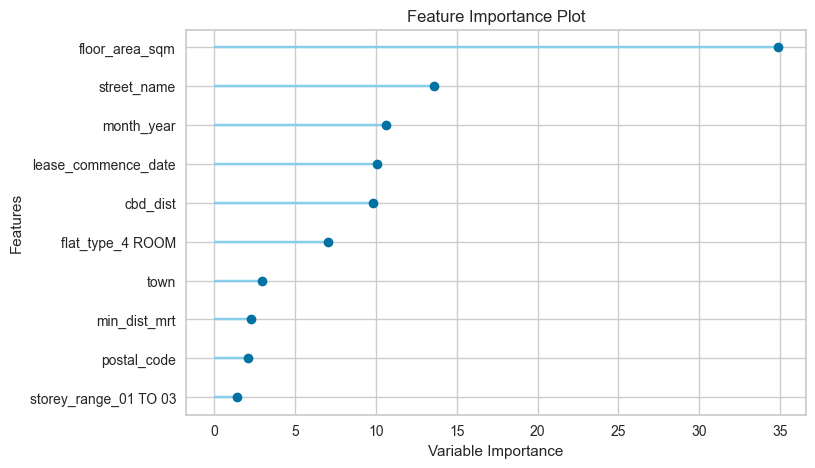

In [51]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [52]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Using the Catboost

This was when i first run Xgboost was recommended over Catboost

Explanation: 
- Mean Absolute Error (MAE):
    - CatBoost has a lower MAE (19,572.31) compared to XGBoost (21,064.71). This indicates that CatBoost has smaller average prediction errors.
- Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):
    - CatBoost has lower MSE (742,332,506.93) and RMSE (27,243.32) compared to XGBoost (867,344,646.40 and 29,448.26, respectively). This suggests that CatBoost has fewer and smaller large errors.

- R² (Coefficient of Determination):
    - CatBoost has a slightly higher R² (0.9728) compared to XGBoost (0.9682). This indicates that CatBoost explains a slightly higher proportion of the variance in the target variable.

- RMSLE (Root Mean Squared Logarithmic Error):
    - CatBoost has a lower RMSLE (0.0557) compared to XGBoost (0.0595), indicating better performance in terms of relative errors.

- Mean Absolute Percentage Error (MAPE):
    - CatBoost has a lower MAPE (4.19%) compared to XGBoost (4.48%), indicating it is more accurate in percentage terms.

- Stability (Standard Deviation):
    - CatBoost generally has lower standard deviations across most metrics, suggesting more consistent performance across different folds.

Conclusion:

CatBoost outperforms XGBoost across most metrics, including MAE, MSE, RMSE, RMSLE, MAPE, and R². It also shows more consistent results (lower standard deviation). Therefore, CatBoost would be the better model to use in this scenario

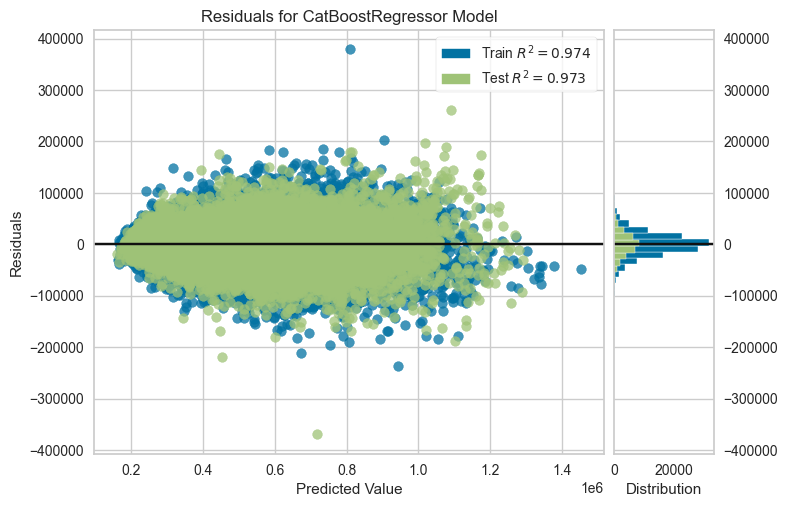

In [53]:
# Analyze the Model 
plot_model(best, plot = 'residuals')

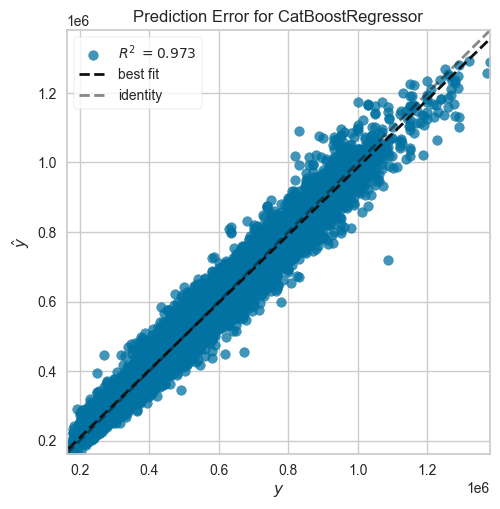

In [54]:
plot_model(best, plot='error')

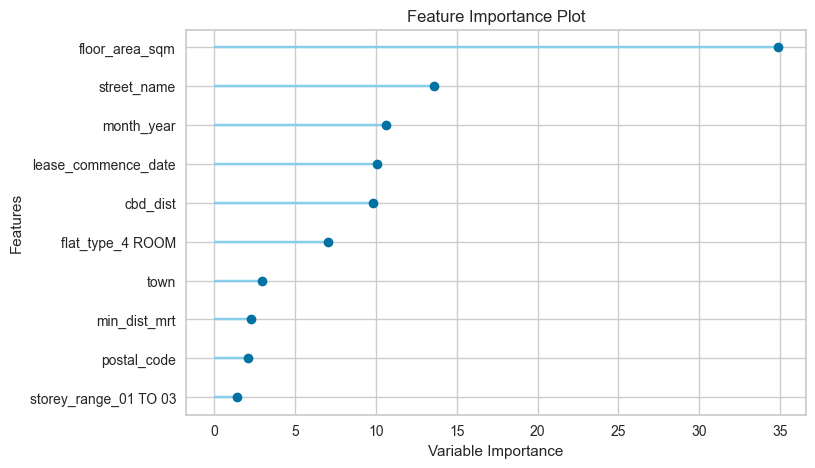

In [55]:
plot_model(best, plot = 'feature')

In [56]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Prediction

In [57]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,19531.1620,736740503.0866,27142.9642,0.9732,0.0553,0.0417


In [65]:
# predict on test set
holdout_pred2 = predict_model(best2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,21132.6191,871987520.0000,29529.4375,0.9683,0.0595,0.0449


In [58]:
# show predictions df
holdout_pred.head()

,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,cbd_dist,min_dist_mrt,resale_price,prediction_label
35,BUKIT BATOK STREET 21,BUKIT BATOK,650208,2016-01-01,3 ROOM,07 TO 09,73.0,Model A,1983,13359.442383,315.864410,326000.0,320635.630762
21577,PUNGGOL FIELD,PUNGGOL,821268,2017-02-01,5 ROOM,13 TO 15,113.0,Premium Apartment,2013,14340.946289,1389.423096,636000.0,613142.600838
53552,WOODLANDS DRIVE 50,WOODLANDS,732899,2018-08-01,4 ROOM,01 TO 03,100.0,Model A,1997,18089.962891,777.154297,315000.0,311639.145696
164556,HOUGANG AVENUE 9,HOUGANG,530918,2023-01-01,4 ROOM,13 TO 15,100.0,Model A,1998,10847.189453,1094.714111,548000.0,529573.668078
153952,JELEBU ROAD,BUKIT PANJANG,670183,2022-09-01,4 ROOM,07 TO 09,91.0,Premium Apartment,2003,14540.222656,211.665710,645000.0,624046.523437


In [66]:
holdout_pred2.head()

,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,cbd_dist,min_dist_mrt,resale_price,prediction_label
35,BUKIT BATOK STREET 21,BUKIT BATOK,650208,2016-01-01,3 ROOM,07 TO 09,73.0,Model A,1983,13359.442383,315.864410,326000.0,312696.90625
21577,PUNGGOL FIELD,PUNGGOL,821268,2017-02-01,5 ROOM,13 TO 15,113.0,Premium Apartment,2013,14340.946289,1389.423096,636000.0,607517.56250
53552,WOODLANDS DRIVE 50,WOODLANDS,732899,2018-08-01,4 ROOM,01 TO 03,100.0,Model A,1997,18089.962891,777.154297,315000.0,312823.15625
164556,HOUGANG AVENUE 9,HOUGANG,530918,2023-01-01,4 ROOM,13 TO 15,100.0,Model A,1998,10847.189453,1094.714111,548000.0,516686.18750
153952,JELEBU ROAD,BUKIT PANJANG,670183,2022-09-01,4 ROOM,07 TO 09,91.0,Premium Apartment,2003,14540.222656,211.665710,645000.0,638300.37500


This further proves why catbost is better

The model seems to perform well, with predictions close to the actual resale prices.

In [59]:
df.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955


In [60]:
# copy data and drop charges

new_data = df.copy()
new_data.drop('resale_price', axis=1, inplace=True)
new_data.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,cbd_dist,min_dist_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01-01,3 ROOM,04 TO 06,68.0,New Generation,1981,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01-01,3 ROOM,10 TO 12,68.0,New Generation,1981,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01-01,3 ROOM,01 TO 03,67.0,New Generation,1980,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01-01,4 ROOM,07 TO 09,92.0,New Generation,1980,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01-01,3 ROOM,10 TO 12,68.0,New Generation,1981,1.362111,103.850767,8747.934242,822.147955


In [61]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,cbd_dist,min_dist_mrt,prediction_label
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01-01,3 ROOM,04 TO 06,68.0,New Generation,1981,1.373922,103.855621,10065.227539,847.235718,302112.096439
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01-01,3 ROOM,10 TO 12,68.0,New Generation,1981,1.361343,103.851700,8662.831055,928.311462,316130.125569
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01-01,3 ROOM,01 TO 03,67.0,New Generation,1980,1.370816,103.859192,9749.916016,1094.432495,290237.831407
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01-01,4 ROOM,07 TO 09,92.0,New Generation,1980,1.370816,103.859192,9749.916016,1094.432495,435426.009613
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01-01,3 ROOM,10 TO 12,68.0,New Generation,1981,1.362111,103.850769,8747.934570,822.147949,318096.182199


In [62]:
test= pd.concat([get_config('X_test'), get_config('y_test')], axis=1)
test.head()

,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,cbd_dist,min_dist_mrt,resale_price
35,BUKIT BATOK STREET 21,BUKIT BATOK,650208,2016-01-01,3 ROOM,07 TO 09,73.0,Model A,1983,13359.442383,315.864410,326000.0
21577,PUNGGOL FIELD,PUNGGOL,821268,2017-02-01,5 ROOM,13 TO 15,113.0,Premium Apartment,2013,14340.946289,1389.423096,636000.0
53552,WOODLANDS DRIVE 50,WOODLANDS,732899,2018-08-01,4 ROOM,01 TO 03,100.0,Model A,1997,18089.962891,777.154297,315000.0
164556,HOUGANG AVENUE 9,HOUGANG,530918,2023-01-01,4 ROOM,13 TO 15,100.0,Model A,1998,10847.189453,1094.714111,548000.0
153952,JELEBU ROAD,BUKIT PANJANG,670183,2022-09-01,4 ROOM,07 TO 09,91.0,Premium Apartment,2003,14540.222656,211.665710,645000.0


In [63]:
predictions2 = predict_model(best, data=test)
predictions2.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,19531.1620,736740503.0866,27142.9642,0.9732,0.0553,0.0417


,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,cbd_dist,min_dist_mrt,resale_price,prediction_label
35,BUKIT BATOK STREET 21,BUKIT BATOK,650208,2016-01-01,3 ROOM,07 TO 09,73.0,Model A,1983,13359.442383,315.864410,326000.0,320635.630762
21577,PUNGGOL FIELD,PUNGGOL,821268,2017-02-01,5 ROOM,13 TO 15,113.0,Premium Apartment,2013,14340.946289,1389.423096,636000.0,613142.600838
53552,WOODLANDS DRIVE 50,WOODLANDS,732899,2018-08-01,4 ROOM,01 TO 03,100.0,Model A,1997,18089.962891,777.154297,315000.0,311639.145696
164556,HOUGANG AVENUE 9,HOUGANG,530918,2023-01-01,4 ROOM,13 TO 15,100.0,Model A,1998,10847.189453,1094.714111,548000.0,529573.668078
153952,JELEBU ROAD,BUKIT PANJANG,670183,2022-09-01,4 ROOM,07 TO 09,91.0,Premium Apartment,2003,14540.222656,211.665710,645000.0,624046.523437


# Save Model

In [67]:
# save pipeline
save_model(best, '../models/house-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['month'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                              'lease_commence_date', 'cbd_dist',
                                              'min_dist_mrt'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(i...
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('remove_outliers',
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                 ('transformation',
                  TransformerWrapper(tr

In [68]:
# load pipeline
loaded_best_pipeline = load_model('../models/house-pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\javer\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['month'],
                                    transformer=ExtractDateTimeFeatures())),
                ('numerical_imputer',
                 TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                             'lease_commence_date', 'cbd_dist',
                                             'min_dist_mrt'],
                                    transformer=SimpleImputer())),
                ('c...
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('remove_outliers',
                 TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x00000236C3EB7E20>)])

# Consume model with MLFlow

In [70]:
import mlflow

#Replace with your run id from mlflow localhost website
logged_model = 'runs:/d8c7542a5dc9404c874bfb832bb97160/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

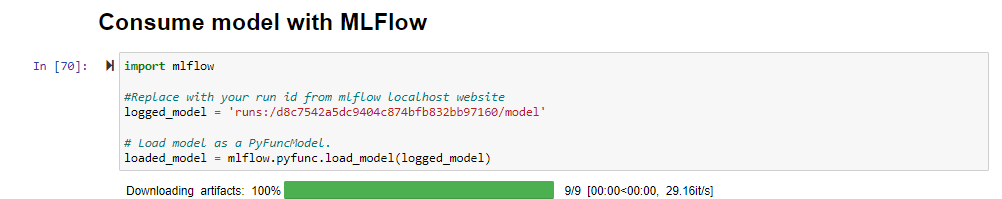

# For the display of the values

In [71]:
# Group by town and create a dictionary mapping towns to street names
streets_by_town = df.groupby('town')['street_name'].unique().apply(list).to_dict()

# Extract unique values from the dataset
flat_types = df['flat_type'].unique().tolist()
storey_range = df['storey_range'].unique().tolist()
flat_model = df['flat_model'].unique().tolist()

# Create a DataFrame for each unique value set
streets_df = pd.DataFrame(list(streets_by_town.items()), columns=['town', 'street_names'])
flat_types_df = pd.DataFrame(flat_types, columns=['flat_type'])
storey_range_df = pd.DataFrame(storey_range, columns=['storey_range'])
flat_model_df = pd.DataFrame(flat_model, columns=['flat_model'])

In [72]:
# Save each DataFrame to a separate CSV file
streets_df.to_csv('../data/housing/street_names_by_town.csv', index=False)
flat_types_df.to_csv('../data/housing/flat_types.csv', index=False)
storey_range_df.to_csv('../data/housing/storey_range.csv', index=False)
flat_model_df.to_csv('../data/housing/flat_model.csv', index=False)

In [ ]:
# Load unique values from the Excel file
# excel_file = '../data/housing_unique_values.xlsx'
# streets_by_town_df = pd.read_excel(excel_file, sheet_name='Streets by Town')
# flat_types_df = pd.read_excel(excel_file, sheet_name='Flat Types')
# storey_range_df = pd.read_excel(excel_file, sheet_name='Storey Range')
# flat_model_df = pd.read_excel(excel_file, sheet_name='Flat Model')